# Name: Anshul Sahu
# Roll No.: A2-29
# CV TA-2 Mini Project

## Harris Corner Detection

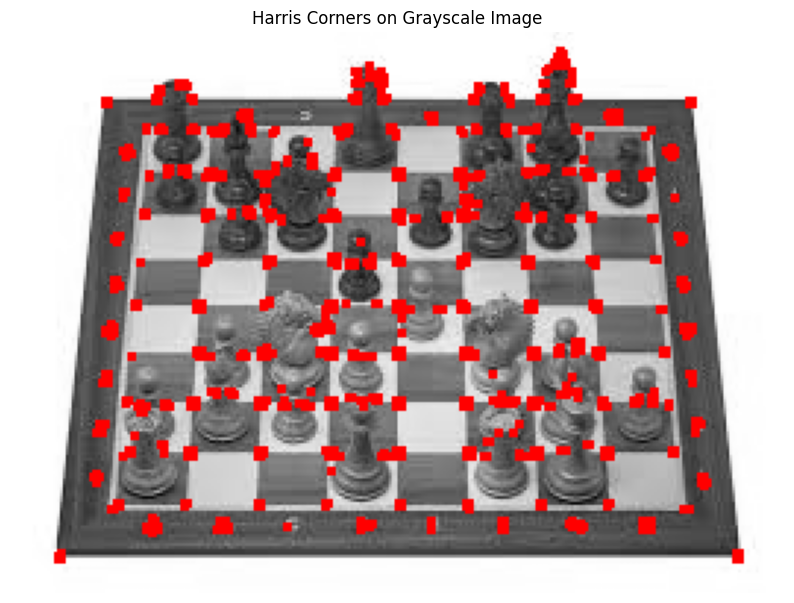

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('chess.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris corner detection
gray_float = np.float32(gray)
dst = cv2.cornerHarris(gray_float, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

# Convert grayscale to BGR to draw red corners
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
gray_bgr[dst > 0.01 * dst.max()] = [0, 0, 255]

# Convert BGR to RGB for matplotlib display
gray_rgb = cv2.cvtColor(gray_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(gray_rgb)
plt.axis('off')
plt.title('Harris Corners on Grayscale Image')
plt.show()


## Shi Thomasi Corner Detection

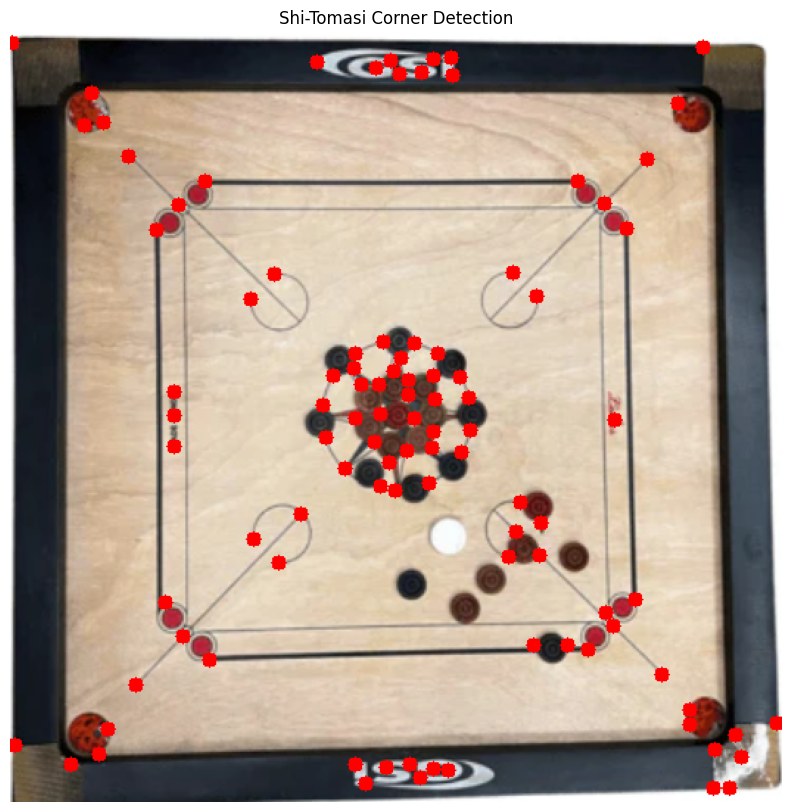

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('carrom.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Shi-Tomasi corner detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int64(corners)

# Draw detected corners as circles
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (0, 0, 255), -1)  # Red circles

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the result with increased figure size
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Shi-Tomasi Corner Detection')
plt.show()

## 2D transformations such as Negative, Logarithmic, Gamma, Affine, and Cropping on an image

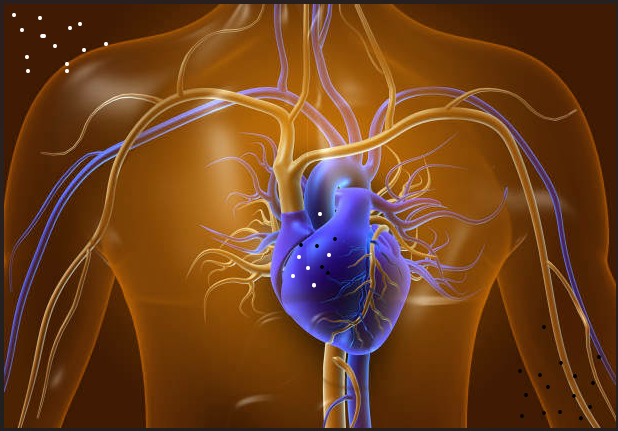

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("heartnew.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

431 618


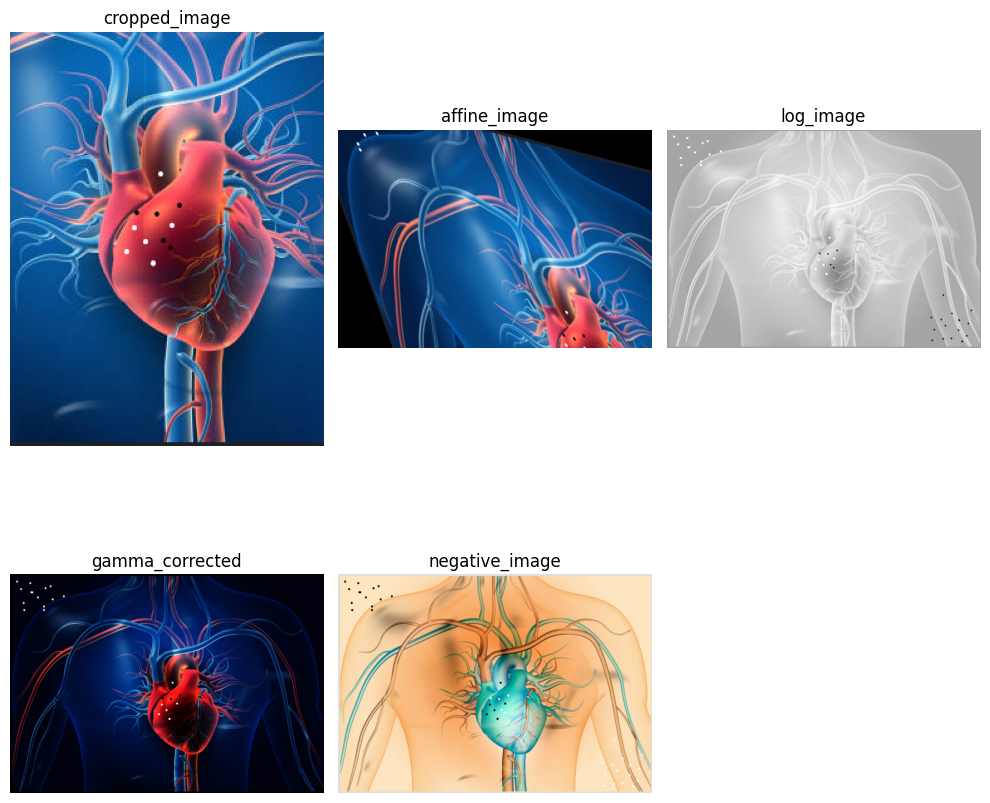

In [25]:
#Crop section
x, y, w, h = 200, 100, 250, 6000
cropped_image = image[y:y+h, x:x+w]

#Affine section
rows, cols,_ = image.shape
print(rows, cols)

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 1], [200, 50], [100, 250]])

matrix = cv2.getAffineTransform(pts1, pts2)
affine_image = cv2.warpAffine(image, matrix, (cols, rows))

#Brightness section - log
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_float = gray_image.astype(np.float64)
c = 255 / np.log(1 + np.max(gray_float))  # Scale to 255
log_image = c * np.log(1 + gray_float)

#Gamma
gamma = 2.2
gamma_corrected = np.power(image / 255.0, gamma)*255
gamma_corrected = np.uint8(gamma_corrected)

#negative
negative_image = 255 - image

titles = ['cropped_image', 'affine_image', 'log_image', 'gamma_corrected', 'negative_image']
images = [cropped_image, affine_image, log_image, gamma_corrected, negative_image]

#Plotting all the results
plt.figure(figsize=(10, 10))
for i in range(len(titles)):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
  plt.axis('off')

plt.tight_layout()
plt.show()